### Dataset com as distâncias entre os municípios retirado de:

https://data.mendeley.com/datasets/vj8bwtwynb/1

In [1]:
#Dependências Necessárias

import pandas as pd
from tqdm import tqdm
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Gerando o Dataframe

df_capitais = pd.read_csv(r'data/distancias_capitais.csv')
df_capitais

,nome_municipio1,cod_municipio1,nome_municipio2,cod_municipio2,distanciaGeo,distanciaCos,distanciaHsin,distanciaMeeus,distanciaSvince
0,Aracaju,2800308,Aracaju,2800308,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,Belém,1501402,Aracaju,2800308,1.639307e+06,1.643671e+06,1.643671e+06,1.639291e+06,1.643671e+06
2,Belo Horizonte,3106200,Aracaju,2800308,1.238024e+06,1.242739e+06,1.242739e+06,1.238014e+06,1.242739e+06
3,Boa Vista,1400100,Aracaju,2800308,3.024026e+06,3.029031e+06,3.029031e+06,3.024005e+06,3.029031e+06
4,Brasília,5300108,Aracaju,2800308,1.293757e+06,1.294959e+06,1.294959e+06,1.293752e+06,1.294959e+06
...,...,...,...,...,...,...,...,...,...
724,Salvador,2927408,Vitória,3205309,8.353317e+05,8.399841e+05,8.399841e+05,8.353270e+05,8.399841e+05
725,São Luís,2111300,Vitória,3205309,2.013302e+06,2.025330e+06,2.025330e+06,2.013285e+06,2.025330e+06
726,São Paulo,3550308,Vitória,3205309,7.442848e+05,7.449277e+05,7.449277e+05,7.442827e+05,7.449277e+05
727,Teresina,2211001,Vitória,3205309,1.705682e+06,1.715981e+06,1.715981e+06,1.705669e+06,1.715981e+06


In [3]:
# Criando  a matriz quadrada de distâncias

municipios = pd.concat([df_capitais['nome_municipio1'], df_capitais['nome_municipio2']]).unique()
distancia_matrix = pd.DataFrame(index=municipios, columns=municipios, data=0.0)

for _, row in tqdm(df_capitais.iterrows()):
    distancia_matrix.loc[row['nome_municipio1'], row['nome_municipio2']] = row['distanciaGeo']
    distancia_matrix.loc[row['nome_municipio1'], row['nome_municipio2']] = row['distanciaGeo']
    
distancia_matrix.head(3)

729it [00:00, 1811.90it/s]


,Aracaju,Belém,Belo Horizonte,Boa Vista,Brasília,Campo Grande,Cuiabá,Curitiba,Florianópolis,Fortaleza,...,Porto Alegre,Porto Velho,Recife,Rio Branco,Rio de Janeiro,Salvador,São Luís,São Paulo,Teresina,Vitória
Aracaju,0.000000e+00,1.639307e+06,1.238024e+06,3.024026e+06,1.293757e+06,2.155619e+06,2.125488e+06,2.057335e+06,2.203137e+06,8.119122e+05,...,2.574606e+06,2.951928e+06,3.976001e+05,3.367655e+06,1.479761e+06,2.764801e+05,1.221466e+06,1.727093e+06,9.018718e+05,1.097362e+06
Belém,1.639307e+06,0.000000e+00,2.101082e+06,1.436256e+06,1.585506e+06,2.204632e+06,1.773575e+06,2.652899e+06,2.892582e+06,1.134064e+06,...,3.175737e+06,1.888927e+06,1.676098e+06,2.337807e+06,2.441852e+06,1.683724e+06,4.831507e+05,2.450774e+06,7.489772e+05,2.268056e+06
Belo Horizonte,1.238024e+06,2.101082e+06,0.000000e+00,3.110535e+06,6.236599e+05,1.120140e+06,1.375425e+06,8.202476e+05,9.724860e+05,1.884411e+06,...,1.339780e+06,2.478679e+06,1.635476e+06,2.791317e+06,3.408857e+05,9.616473e+05,1.922094e+06,4.895384e+05,1.643884e+06,3.805493e+05


In [4]:
# Aplicando MDS

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
coords = mds.fit_transform(distancia_matrix)

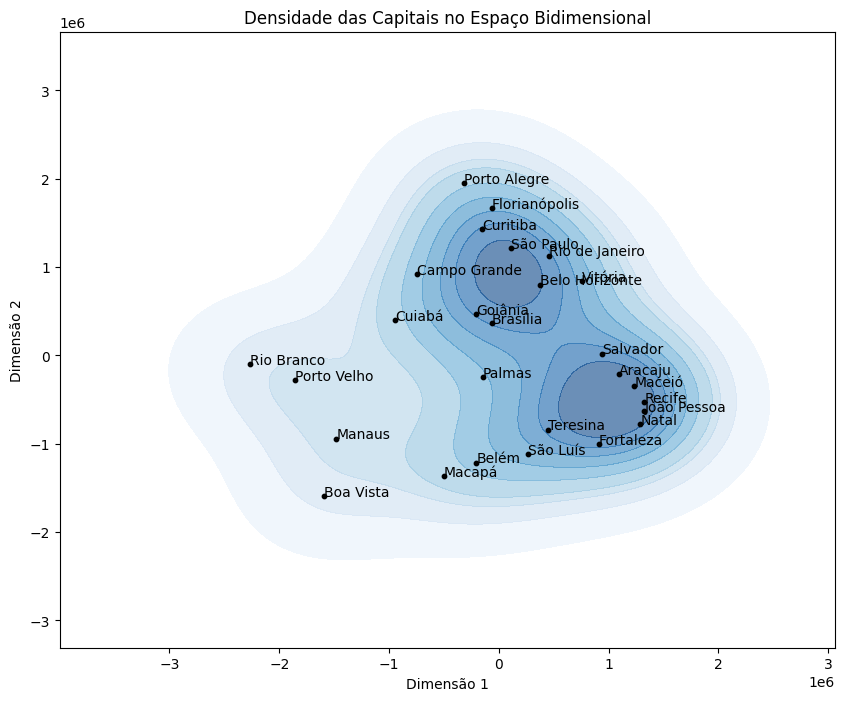

In [5]:
# Gráfico de densidade bidimensional para as coordenadas

plt.figure(figsize=(10, 8))
sns.kdeplot(
    x=coords[:, 0], 
    y=coords[:, 1], 
    cmap="Blues", 
    fill=True, 
    alpha=0.6
)

# Adicionar os pontos e os nomes dos municípios
plt.scatter(coords[:, 0], coords[:, 1], color="black", s=10)
for i, txt in enumerate(municipios):
    plt.annotate(txt, (coords[i, 0], coords[i, 1]))

plt.title("Densidade das Capitais no Espaço Bidimensional")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

In [6]:
# Fazendo espelhamento na vertical

coords[:, 1] = -coords[:, 1]

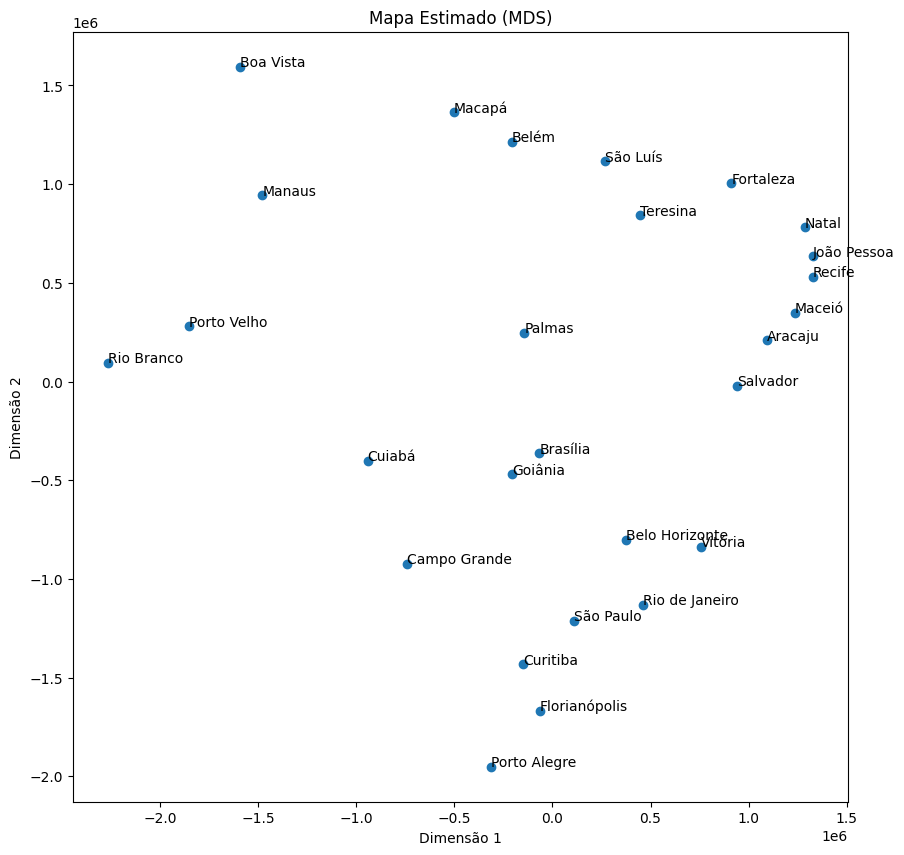

In [7]:
# Visualizando o resultado
plt.figure(figsize=(10, 10))
plt.scatter(coords[:, 0], coords[:, 1])

for i, txt in enumerate(municipios):
    plt.annotate(txt, (coords[i, 0], coords[i, 1]))

plt.title("Mapa Estimado (MDS)")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

C:\Users\Trabalho\AppData\Local\Temp\ipykernel_8984\2892448759.py:8: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distancia_matrix, method='ward')


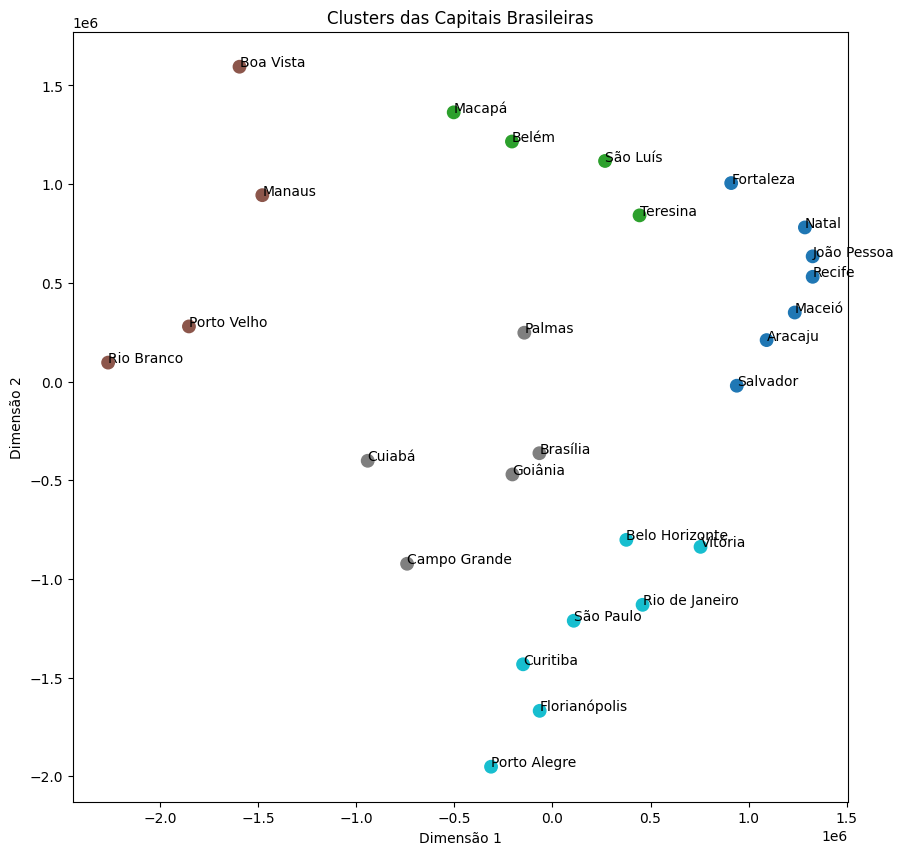

In [8]:
#Gerando clusterias baseados na distância entre as capitais. 
#Talvez clusteres baseados em centroides geográficos sejam diferentes.

from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage

# Gerar o linkage hierárquico com base nas distâncias
linkage_matrix = linkage(distancia_matrix, method='ward')

# Definir um corte na hierarquia para criar clusters
n_clusters = 5
clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

# Plotar os clusters no espaço bidimensional
plt.figure(figsize=(10, 10))
plt.scatter(coords[:, 0], coords[:, 1], c=clusters, cmap='tab10', s=80)
for i, txt in enumerate(municipios):
    plt.annotate(txt, (coords[i, 0], coords[i, 1]))

plt.title("Clusters das Capitais Brasileiras")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

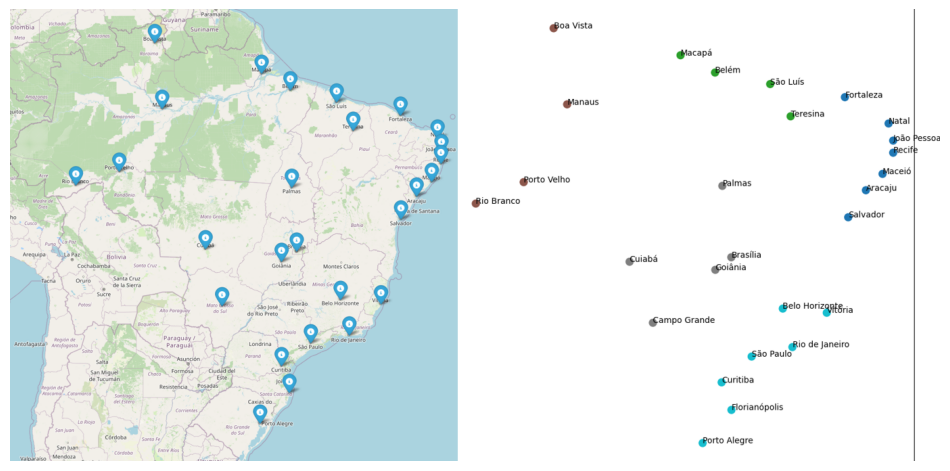

In [9]:
#Lado a lado com um mapa real

import matplotlib.image as mpimg

file_path = "mapa_brasil_PCA.png"

# Carregar e exibir a imagem
img = mpimg.imread(file_path)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')  # Remove os eixos
plt.show()

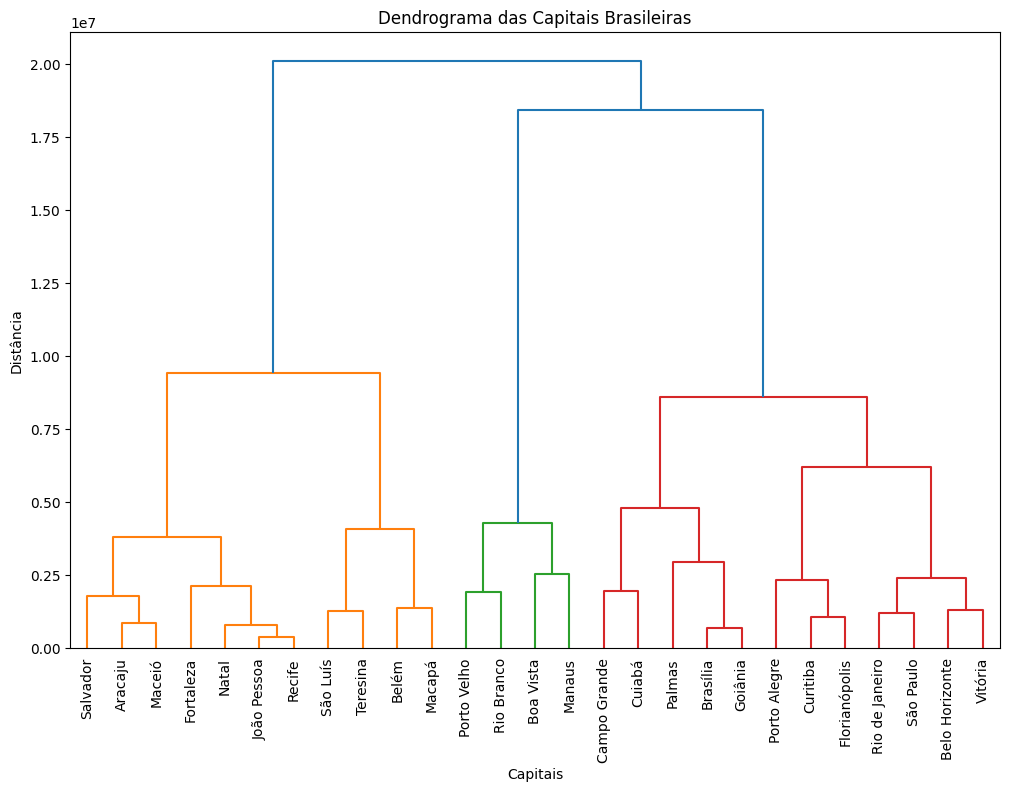

In [10]:
# Dendrograma para estimar alguma hirarquia baseada nas distâncias

plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix, 
    labels=municipios, 
    leaf_rotation=90, 
    leaf_font_size=10
)
plt.title("Dendrograma das Capitais Brasileiras")
plt.xlabel("Capitais")
plt.ylabel("Distância")
plt.show()


### Uma Análise semelhante para a distância filogenética de batérias
dataset de: *tattabio/fefe_phylogeny_distances*

In [11]:
#pip install fastparquet huggingface_hub

In [12]:
#Importar o dataset

import pandas as pd

df_phylo_distances = pd.read_parquet("hf://datasets/tattabio/fefe_phylogeny_distances/data/train-00000-of-00001.parquet")
df_phylo_distances

,ID1,ID2,distance
0,FeFe_Group_A1|Lachnoclostridium_bolteae_WP_002...,FeFe_Group_A1|Eubacterium_hallii_WP_005351469.1,0.769436
1,FeFe_Group_A1|Lachnoclostridium_bolteae_WP_002...,FeFe_Group_A1|Erysipelatoclostridium_innocuum_...,1.182174
2,FeFe_Group_A1|Lachnoclostridium_bolteae_WP_002...,FeFe_Group_A1|Lachnoclostridium_hylemonae_WP_0...,1.120668
3,FeFe_Group_A1|Lachnoclostridium_bolteae_WP_002...,FeFe_Group_A1|Fusobacterium_mortiferum_WP_0058...,1.264958
4,FeFe_Group_A1|Lachnoclostridium_bolteae_WP_002...,FeFe_Group_A1|Sutterella_wadsworthensis_WP_005...,1.398486
...,...,...,...
73531,FeFe_Group_A3|Spirochaeta_smaragdinae_WP_01325...,FeFe_Group_A3|Treponema_brennaborense_WP_01375...,0.699680
73532,FeFe_Group_A3|Spirochaeta_smaragdinae_WP_01325...,FeFe_Group_A3|Brachyspira_hampsonii_WP_0087280...,0.786018
73533,FeFe_Group_A3|Treponema_azotonutricium_WP_0157...,FeFe_Group_A3|Treponema_brennaborense_WP_01375...,0.624210
73534,FeFe_Group_A3|Treponema_azotonutricium_WP_0157...,FeFe_Group_A3|Brachyspira_hampsonii_WP_0087280...,0.845866


In [13]:
# Criar a matriz quadrada de distâncias

phylos = pd.concat([df_phylo_distances['ID1'], df_phylo_distances['ID2']]).unique()
distancia_matrix = pd.DataFrame(index=phylos, columns=phylos, data=0.0)

for _, row in tqdm(df_phylo_distances.iterrows()):
    distancia_matrix.loc[row['ID1'], row['ID2']] = row['distance']
    distancia_matrix.loc[row['ID2'], row['ID1']] = row['distance']
 
distancia_matrix.head(3)

73536it [00:36, 2018.18it/s]


,FeFe_Group_A1|Lachnoclostridium_bolteae_WP_002568840.1,FeFe_Group_A1|Eubacterium_hallii_WP_005351469.1,FeFe_Group_A1|Erysipelatoclostridium_innocuum_WP_002607524.1,FeFe_Group_A1|Lachnoclostridium_hylemonae_WP_006442921.1,FeFe_Group_A1|Fusobacterium_mortiferum_WP_005884626.1,FeFe_Group_A1|Sutterella_wadsworthensis_WP_005436344.1,FeFe_Group_A1|Fusobacterium_ulcerans_WP_005981915.1,FeFe_Group_A1|Anaerostipes_caccae_WP_006566021.1,FeFe_Group_A1|Lachnoclostridium_asparagiforme_WP_007716914.1,FeFe_Group_A1|Phascolarctobacterium_succinatutens_WP_009145476.1,...,FeFe_Group_A3|Zymophilus_raffinosivorans_WP_019554879.1,FeFe_Group_A3|Anaerovorax_odorimutans_WP_027400569.1,FeFe_Group_A3|Spirochaeta_thermophila_WP_013313426.1,FeFe_Group_A1|Omnitrophus_fodinae_WP_022808283.1,FeFe_Group_A3|Pleomorphomonas_koreensis_WP_026781963.1,FeFe_Group_A3|Opitutus_terrae_WP_012374366.1,FeFe_Group_A3|Spirochaeta_smaragdinae_WP_013256232.1,FeFe_Group_A3|Treponema_azotonutricium_WP_015712312.1,FeFe_Group_A3|Treponema_brennaborense_WP_013757500.1,FeFe_Group_A3|Brachyspira_hampsonii_WP_008728072.1
FeFe_Group_A1|Lachnoclostridium_bolteae_WP_002568840.1,0.000000,0.769436,1.182174,1.120668,1.264958,1.398486,1.279461,1.256009,1.315936,1.186612,...,2.170743,2.075877,1.993679,2.173380,2.303573,2.178547,2.035230,2.095077,2.170489,2.104043
FeFe_Group_A1|Eubacterium_hallii_WP_005351469.1,0.769436,0.000000,1.095442,1.033935,1.178225,1.311753,1.192728,1.169276,1.229203,1.099879,...,2.084011,1.989145,1.906947,2.086648,2.216840,2.091814,1.948498,2.008345,2.083756,2.017311
FeFe_Group_A1|Erysipelatoclostridium_innocuum_WP_002607524.1,1.182174,1.095442,0.000000,0.843240,0.987530,1.121058,1.002033,0.978581,1.038508,0.909184,...,1.893316,1.798450,1.716252,1.895953,2.026145,1.901119,1.757803,1.817650,1.893061,1.826616


In [14]:
#Renomeando o os organismos para melhor leitura

bacteria_names = ["_".join([name[:3] for name in bac.split('|')[-1].split('_')[:2]]) for bac in distancia_matrix.columns]

In [15]:
# Aplicar MDS

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
coords = mds.fit_transform(distancia_matrix)

In [16]:
# Gráfico de densidade bidimensional

plt.figure(figsize=(100, 100))
sns.kdeplot(
    x=coords[:, 0], 
    y=coords[:, 1], 
    cmap="Blues", 
    fill=True, 
    alpha=0.6,
)

# Adicionar os pontos e os nomes dos organismos
plt.scatter(coords[:, 0], coords[:, 1], color="black", s=5)
for i, txt in enumerate(bacteria_names):
    plt.annotate(txt, (coords[i, 0], coords[i, 1]))

plt.title("Densidade de Organismos no Espaço Bidimensional")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

C:\Users\Trabalho\AppData\Local\Temp\ipykernel_8984\520690058.py:7: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distancia_matrix, method='ward')


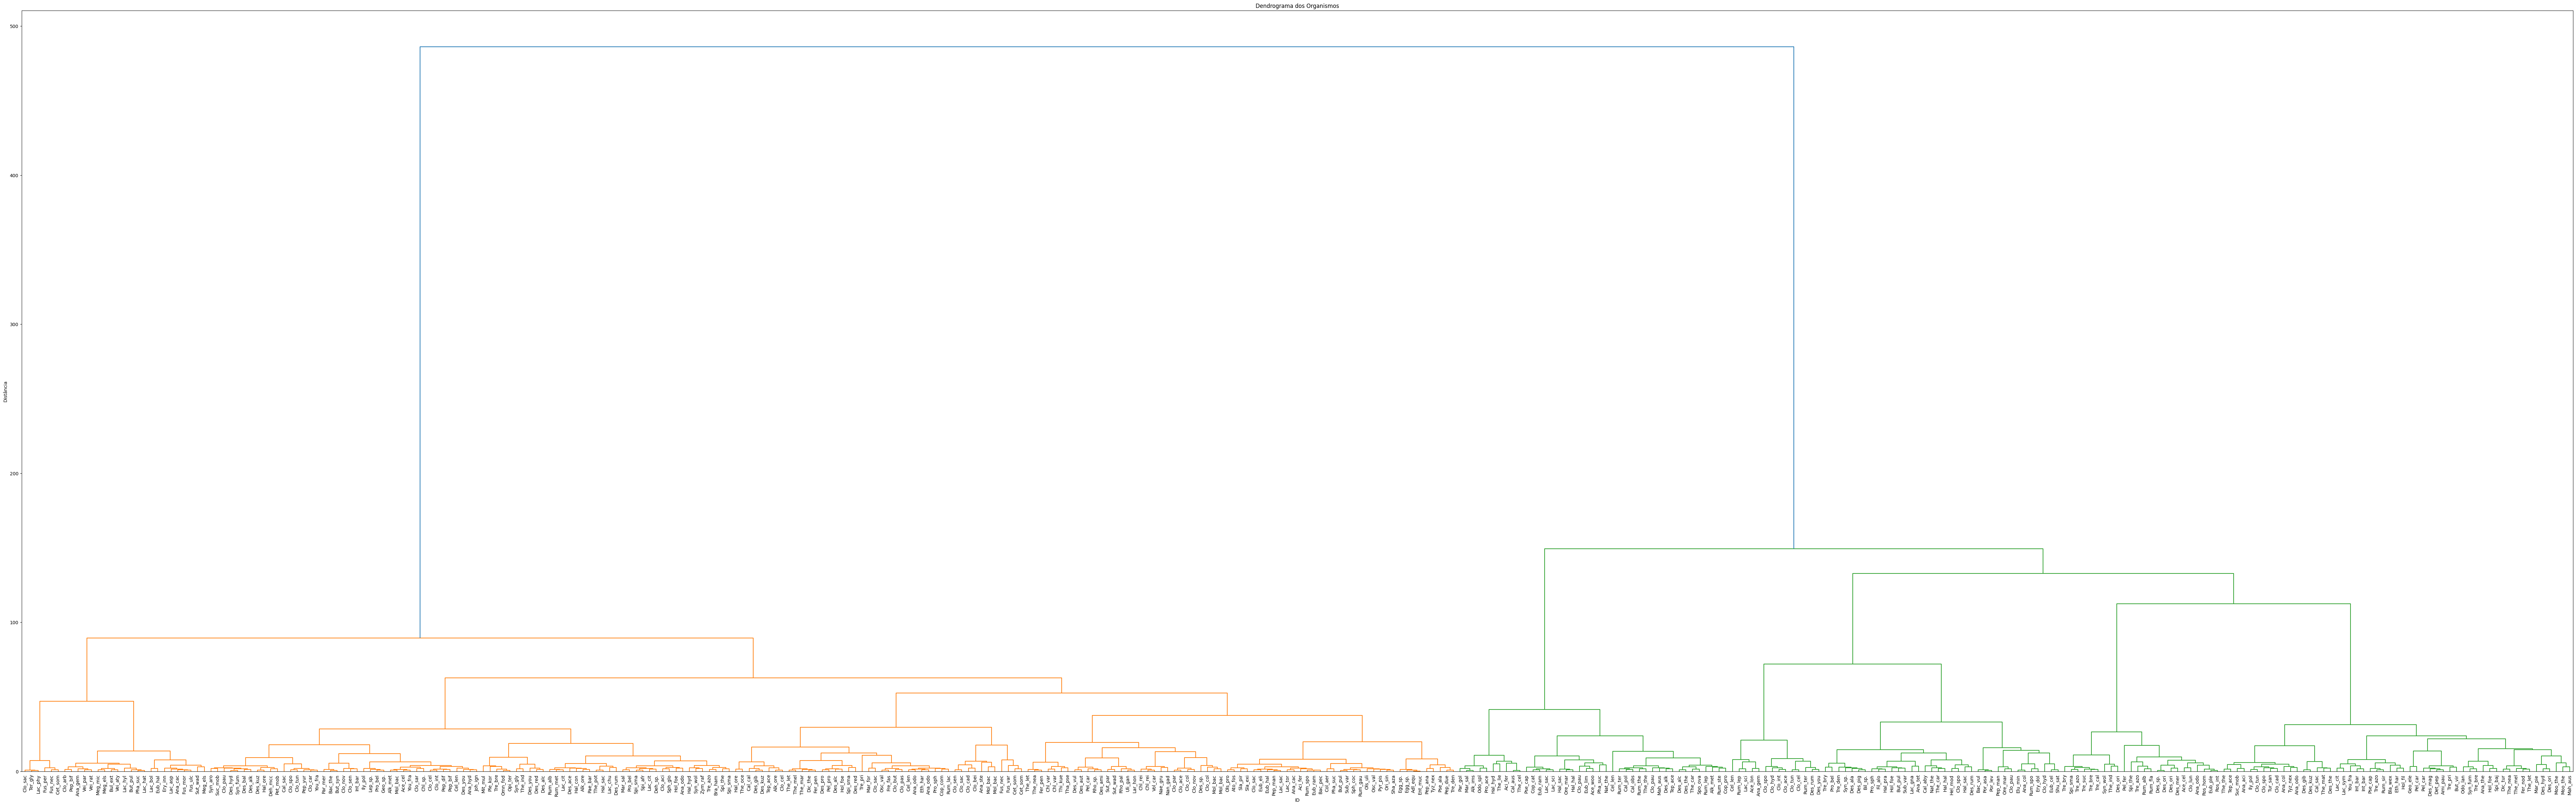

In [17]:
# Dendrograma

from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage

# Gerar o linkage hierárquico com base nas distâncias
linkage_matrix = linkage(distancia_matrix, method='ward')
plt.figure(figsize=(100, 30))
dendrogram(
    linkage_matrix, 
    labels=bacteria_names, 
    leaf_rotation=90, 
    leaf_font_size=10
)
plt.title("Dendrograma dos Organismos")
plt.xlabel("ID")
plt.ylabel("Distância")
plt.show()
